## Main.ipynb
Main file for accumulating examples of breakout trades.
Goal is to use example trades to train a model on these metalabeled trades.

In [1]:
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from neurotrader.trendline_automation import fit_upper_trendline, fit_lower_trendline
from neurotrader.trendline_break_dataset import trendline_breakout_dataset


DEFAULT_LOOKBACK = 168

[*********************100%%**********************]  1 of 1 completed


In [2]:
def conf_matrix_to_df(conf_matrix):
    return pd.DataFrame(conf_matrix)

In [3]:
# Download stock data for a variety of tickers
# Period params: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Interval params: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo

# aapl.drop('Adj Close', axis=1)

"""
Preliminary Data
1. Model trained on whole model vs. AAPL stock
2. Model trained on sector vs. AAPL stock
3. Model trained on lifetime AAPL vs. AAPL stock
"""
# Download desired stock data and find breakout trades for each one

spy = yf.download('SPY', period='5y', interval='1d')
spy_trades, spy_x_train, spy_y_train = trendline_breakout_dataset(spy, DEFAULT_LOOKBACK)
vgt = yf.download('VGT', period='5y', interval='1d')
vgt_trades, vgt_x_train, vgt_y_train = trendline_breakout_dataset(vgt, DEFAULT_LOOKBACK)
msft = yf.download('MSFT', period='5y', interval='1d')
msft_trades, msft_x_train, msft_y_train = trendline_breakout_dataset(msft, DEFAULT_LOOKBACK)
nvda = yf.download('NVDA', period='5y', interval='1d')
nvda_trades, nvda_x_train, nvda_y_train = trendline_breakout_dataset(nvda, DEFAULT_LOOKBACK)
tsm = yf.download('TSM', period='5y', interval='1d')
tsm_trades, tsm_x_train, tsm_y_train = trendline_breakout_dataset(tsm, DEFAULT_LOOKBACK)
amzn = yf.download('AMZN', period='5y', interval='1d')
amzn_trades, amzn_x_train, amzn_y_train = trendline_breakout_dataset(amzn, DEFAULT_LOOKBACK)
lly = yf.download('LLY', period='5y', interval='1d')
lly_trades, lly_x_train, lly_y_train = trendline_breakout_dataset(lly, DEFAULT_LOOKBACK)
jnj = yf.download('JNJ', period='5y', interval='1d')
jnj_trades, jnj_x_train, jnj_y_train = trendline_breakout_dataset(jnj, DEFAULT_LOOKBACK)
wmt = yf.download('WMT', period='5y', interval='1d')
wmt_trades, wmt_x_train, wmt_y_train = trendline_breakout_dataset(wmt, DEFAULT_LOOKBACK)
vgt = yf.download('VGT', period='max', interval='1d')
vgt_trades, vgt_x_train, vgt_y_train = trendline_breakout_dataset(vgt, DEFAULT_LOOKBACK)
aapl = yf.download('AAPL', period='max', interval='1d')
aapl_trades, aapl_x, aapl_y = trendline_breakout_dataset(aapl, DEFAULT_LOOKBACK)

# Combine breakout results with respective groups for training

general_stocks = pd.concat([spy, vgt, msft, nvda, tsm, amzn, lly, jnj, wmt], axis=0)
general_x = pd.concat([spy_x_train, vgt_x_train, msft_x_train, nvda_x_train, tsm_x_train, amzn_x_train, lly_x_train, jnj_x_train, wmt_x_train], axis=0)
general_y = pd.concat([spy_y_train, vgt_y_train, msft_y_train, nvda_y_train, tsm_y_train, amzn_y_train, lly_y_train, jnj_y_train, wmt_y_train], axis=0)

sector_stocks = pd.concat([vgt, msft, nvda, tsm], axis=0)
sector_x_train = pd.concat([vgt_x_train, msft_x_train, nvda_x_train, tsm_x_train], axis=0)
sector_y_train = pd.concat([vgt_y_train, msft_y_train, nvda_y_train, tsm_y_train], axis=0)

aapl = yf.download('AAPL', period='max', interval='1d')
aapl_trades, aapl_x, aapl_y = trendline_breakout_dataset(aapl, DEFAULT_LOOKBACK)

aapl_x_train, aapl_x_test, aapl_y_train, aapl_y_test = train_test_split(aapl_x, aapl_y, test_size=0.25)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
aapltrades, aapl_x, aapl_y = trendline_breakout_dataset(aapl, DEFAULT_LOOKBACK)
print(aapl)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099192   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094017   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087117   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089273   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091861   
...                ...         ...         ...         ...         ...   
2024-04-11  168.339996  175.460007  168.160004  175.039993  175.039993   
2024-04-12  174.259995  178.360001  174.210007  176.550003  176.550003   
2024-04-15  175.360001  176.630005  172.500000  172.690002  172.690002   
2024-04-16  171.750000  173.759995  168.270004  169.380005  169.380005   
2024-04-17  169.580002  170.639999  169.310104  170.244995  170.244995   

               Volume  
Date         

In [5]:
#aapl = yf.download('AAPL', period='max', interval='1d')
aapl_trades, aapl_x, aapl_y = trendline_breakout_dataset(aapl, DEFAULT_LOOKBACK)
aapl_x_train, aapl_x_test, aapl_y_train, aapl_y_test = train_test_split(aapl_x, aapl_y, test_size=0.25)
print(aapl_x_train)

     resist_s  support_s    tl_err       vol   max_dist  class
20  -0.089529  -0.107077 -7.351123  1.985746 -15.682559    0.0
126 -0.083329  -0.038786 -5.944113  1.803912 -12.314629    0.0
235  0.049102   0.058206 -4.706419  0.565266  -8.939281    0.0
102 -0.077836  -0.053445  8.307252  3.688612  16.538825    1.0
207  0.050417   0.052393  4.092562  0.878341   6.967967    1.0
..        ...        ...       ...       ...        ...    ...
181  0.076259   0.079165 -2.183957  1.541560  -5.218320    0.0
135  0.018451  -0.014349  5.706314  8.099652  15.295713    1.0
200 -0.043329  -0.057155  4.614530  0.671854   9.843475    1.0
136  0.033058   0.061718  5.026739  1.747631  14.680685    1.0
204  0.055205   0.133378 -6.470133  1.558891 -17.965233    0.0

[247 rows x 6 columns]


In [6]:
para = yf.download('PARA', period='5y', interval='1d')
para_trades, para_x, para_y = trendline_breakout_dataset(para, DEFAULT_LOOKBACK)
para_x_train, para_x_test, para_y_train, para_y_test = train_test_split(para_x, para_y, test_size=0.25)

[*********************100%%**********************]  1 of 1 completed


In [7]:
general_stocks = pd.concat([spy, vgt, msft, nvda, tsm, amzn, lly, jnj, wmt], axis=0)
general_x_stocks = pd.concat([spy_x_train, vgt_x_train, msft_x_train, nvda_x_train, tsm_x_train, amzn_x_train, lly_x_train, jnj_x_train, wmt_x_train], axis=0)
general_y_stocks = pd.concat([spy_y_train, vgt_y_train, msft_y_train, nvda_y_train, tsm_y_train, amzn_y_train, lly_y_train, jnj_y_train, wmt_y_train], axis=0)
general_trades, general_x, general_y = trendline_breakout_dataset(general_stocks, DEFAULT_LOOKBACK)

general_x_train, general_x_test, general_y_train, general_y_test = train_test_split(general_x, general_y, test_size=0.25)

C:\Users\thoma\Desktop\CS 3540\machine-learning-final\machine-learning-final\neurotrader\trendline_automation.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = -slope * pivot + y[pivot]
C:\Users\thoma\Desktop\CS 3540\machine-learning-final\machine-learning-final\neurotrader\trendline_automation.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return best_slope, -best_slope * pivot + y[pivot]


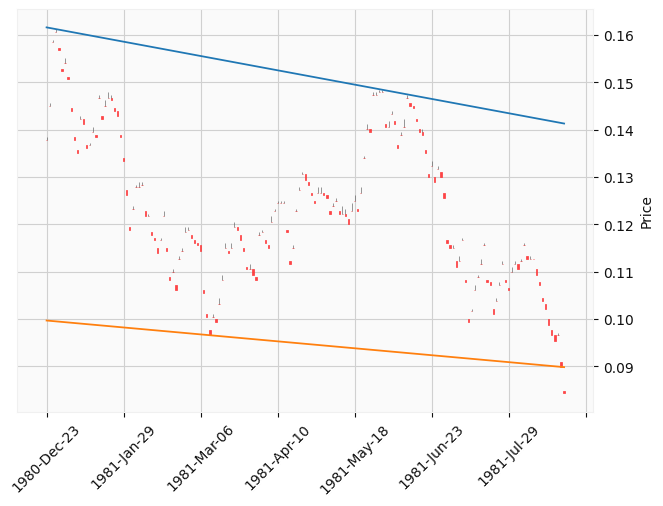

In [8]:
# Plot of example trade, its trendlines, and breakout candle.
index = int(aapl_trades.iloc[0].loc['entry_i'])
aapl_window = aapl[index-DEFAULT_LOOKBACK:index]  # +1 to include candle breaking out of resistance
aapl_window_display = aapl[index-DEFAULT_LOOKBACK:index+1]  # +1 to include candle breaking out of resistance

resist_coefs = fit_upper_trendline(aapl_window['High'])
support_coefs = fit_lower_trendline(aapl_window['Low'])
r_trendline_values = resist_coefs[0] * np.arange(len(aapl_window_display)) + resist_coefs[1]
s_trendline_values = support_coefs[0] * np.arange(len(aapl_window_display)) + support_coefs[1]

apds = [mpf.make_addplot(pd.DataFrame(r_trendline_values)),
        mpf.make_addplot(pd.DataFrame(s_trendline_values))]
mpf.plot(aapl_window_display, type='candle', style='yahoo', addplot=apds)

In [9]:
# Training a general SVM on the metalabled data
model = SVC(kernel="poly")
model.fit(general_x_train, general_y_train)
results = model.predict(general_x_test)
print(conf_matrix_to_df(confusion_matrix(general_y_test, results)))

   0   1
0  0  22
1  2  98


In [10]:
# Training an Apple specific SVM on the metalabled data
model = SVC(kernel="poly")
model.fit(aapl_x_train, aapl_y_train)
results = model.predict(aapl_x_test)
print(conf_matrix_to_df(confusion_matrix(aapl_y_test, results)))

   0   1
0  0  21
1  0  62


In [11]:
# Training a Paramount specific SVM on the metalabled data
model = SVC(kernel="poly")
model.fit(para_x_train, para_y_train)
results = model.predict(para_x_test)
print(conf_matrix_to_df(confusion_matrix(para_y_test, results)))

   0  1
0  0  1
1  0  8
